# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
network_path = os.path.join("..", "networks", "lateral_twopop")
simulation_file_with_synapses = os.path.join(network_path, "simulations", "output-with-synapses-12Hz.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulations", "output-no-synapses-12Hz.hdf5")
duration = 5

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/lateral_twopop/network-config.json
Population unit 1 has 954 neurons
Population unit 2 has 1046 neurons
Population unit 1 has 954 neurons
Population unit 2 has 1046 neurons


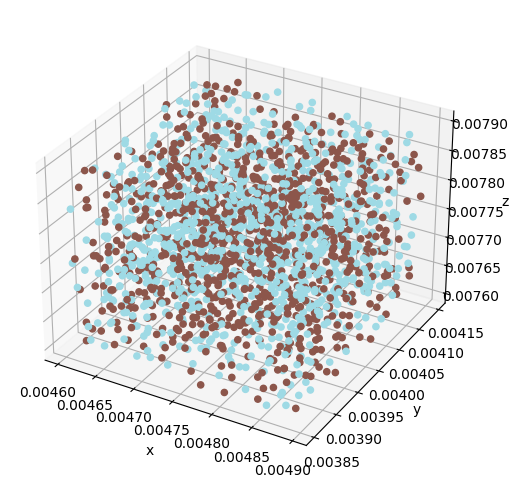

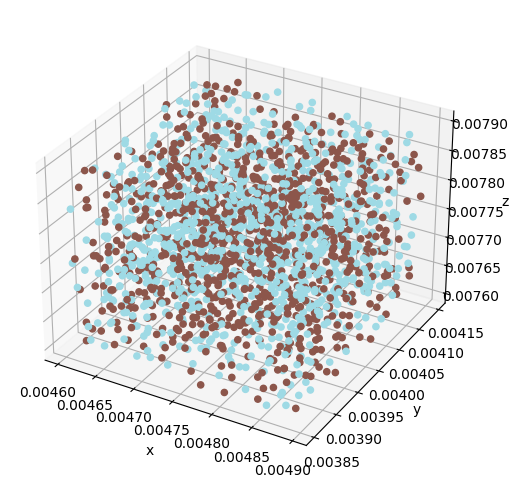

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

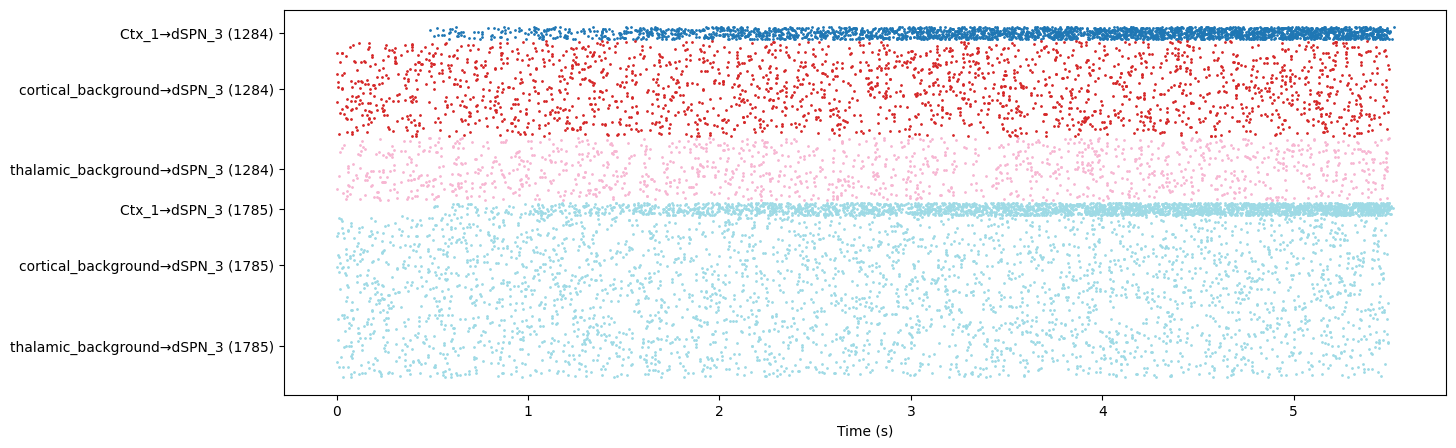

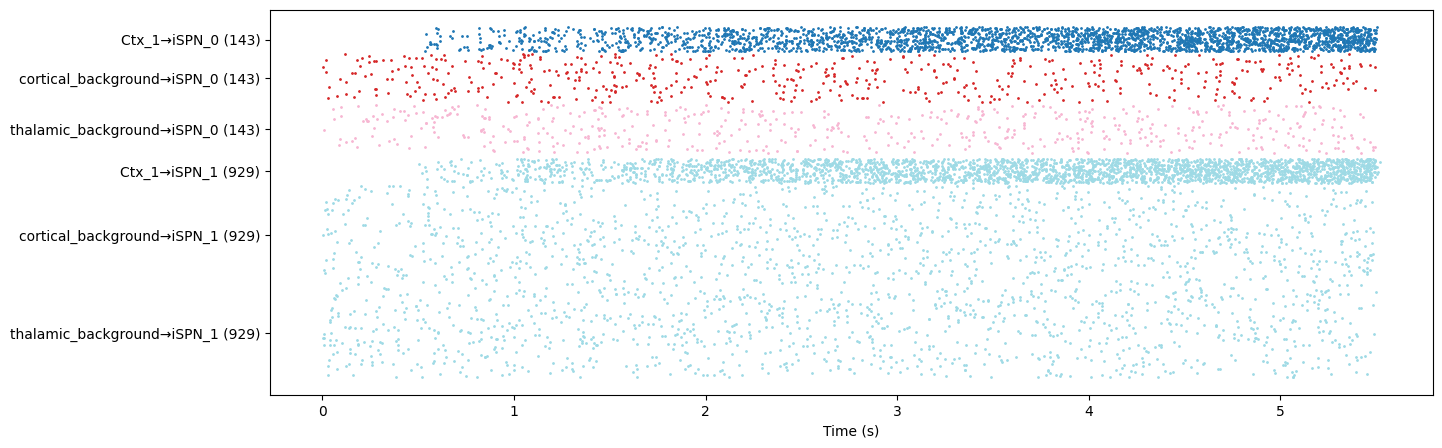

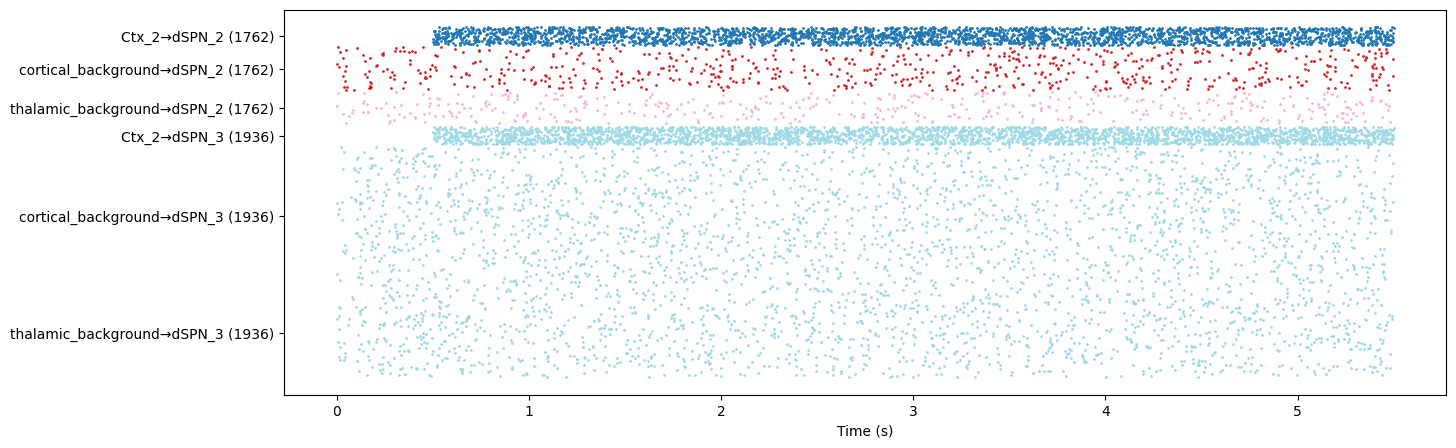

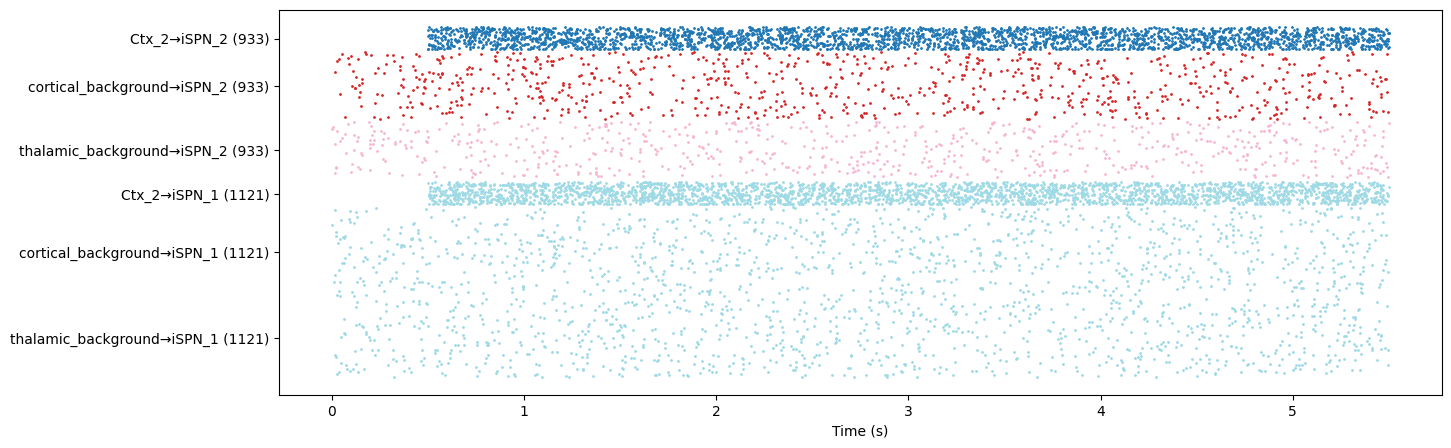

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

# Plot neuron activity

## With lateral inhibtion

Loading ../networks/lateral_twopop/simulations/output-with-synapses-12Hz.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
48: (iSPN_0, p039c9f4f, m7bc82287)
69: (iSPN_0, p581376d6, mf2f3395e)
70: (iSPN_0, p635b801c, m3a845add)
100: (iSPN_0, p67dac726, mc16840cd)
101: (iSPN_0, p581376d6, m7bc82287)
163: (iSPN_0, p581376d6, md0f5647c)
239: (iSPN_0, p635b801c, md0f5647c)
269: (iSPN_0, pf721cf77, mf2f3395e)
325: (iSPN_0, p581376d6, md0f5647c)
342: (iSPN_0, p581376d6, md0f5647c)
373: (iSPN_0, pf721cf77, m3a845add)
397: (iSPN_0, p581376d6, m3a845add)
424: (iSPN_0, pf721cf77, mc16840cd)
436: (iSPN_3, p57956f10, m1083058d)
442: (iSPN_0, p581376d6, mf2f3395e)
445: (iSPN_0, pf721cf77, m3a845add)
507: (iSPN_0, pf721cf77, md0f5647c)
528: (iSPN_0, p635b801c, m3a845add)
549: (iSPN_0, p581376d6, m3a845add)
550: (iSPN_0, pfb05971b, m7bc82287)
571: (iSPN_0, p581376d6, mf2f3395e)
574: (iSPN_0, p635b801c, mf2f3395e)
581: (dSPN_0, pe6ec2d4b, mc710c1a4)
588: 

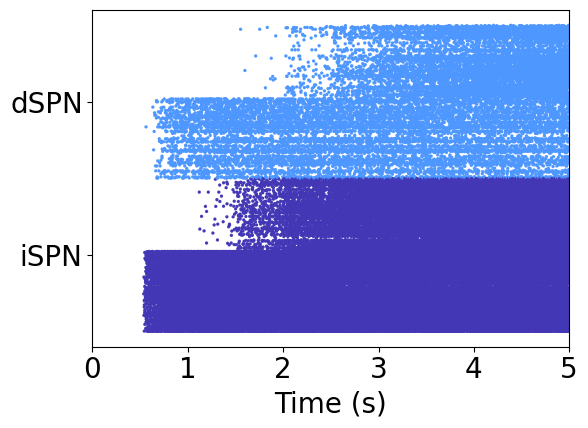

In [4]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=simulation_file_with_synapses)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure ../networks/lateral_twopop/figures/spike-frequency-pop-units1-2.pdf


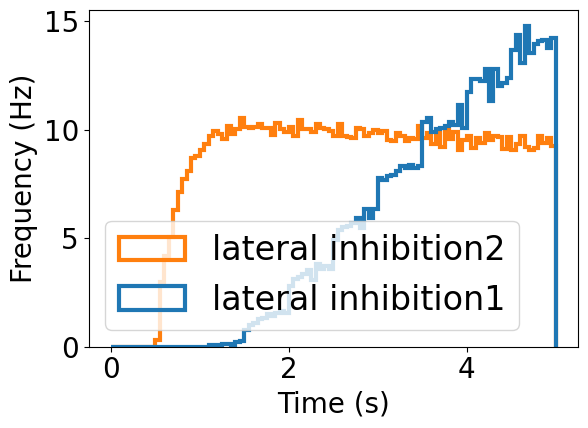

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [5]:
spr.plot_spike_histogram(label_text="lateral inhibition")

## Without lateral inhibition

Loading ../networks/lateral_twopop/simulations/output-no-synapses-12Hz.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
69: (iSPN_0, p581376d6, mf2f3395e)
70: (iSPN_0, p635b801c, m3a845add)
89: (dSPN_2, pb267a31a, m7721d5cf)
163: (iSPN_0, p581376d6, md0f5647c)
189: (iSPN_0, p039c9f4f, m7bc82287)
269: (iSPN_0, pf721cf77, mf2f3395e)
325: (iSPN_0, p581376d6, md0f5647c)
327: (iSPN_0, p581376d6, mf2f3395e)
342: (iSPN_0, p581376d6, md0f5647c)
344: (iSPN_0, pfb05971b, m6486ed26)
372: (iSPN_0, p67dac726, mf2f3395e)
373: (iSPN_0, pf721cf77, m3a845add)
397: (iSPN_0, p581376d6, m3a845add)
424: (iSPN_0, pf721cf77, mc16840cd)
436: (iSPN_3, p57956f10, m1083058d)
442: (iSPN_0, p581376d6, mf2f3395e)
460: (dSPN_2, pb267a31a, m7721d5cf)
526: (iSPN_0, p039c9f4f, m3a845add)
527: (iSPN_0, p581376d6, mf2f3395e)
528: (iSPN_0, p635b801c, m3a845add)
549: (iSPN_0, p581376d6, m3a845add)
571: (iSPN_0, p581376d6, mf2f3395e)
574: (iSPN_0, p635b801c, mf2f3395e)
591: (i

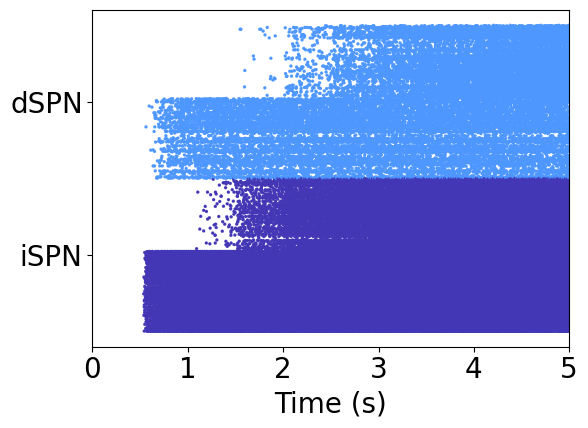

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=simulation_file_no_synapses)

spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure ../networks/lateral_twopop/figures/spike-frequency-pop-units1-2.pdf


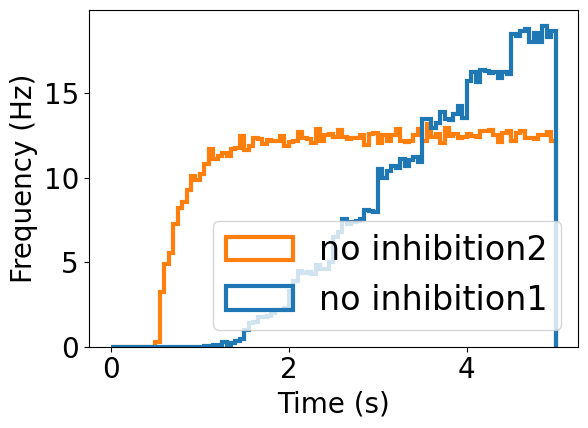

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [7]:
spr_no.plot_spike_histogram(label_text="no inhibition")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/lateral_twopop/figures/spike-frequency-pop-units1-2.pdf


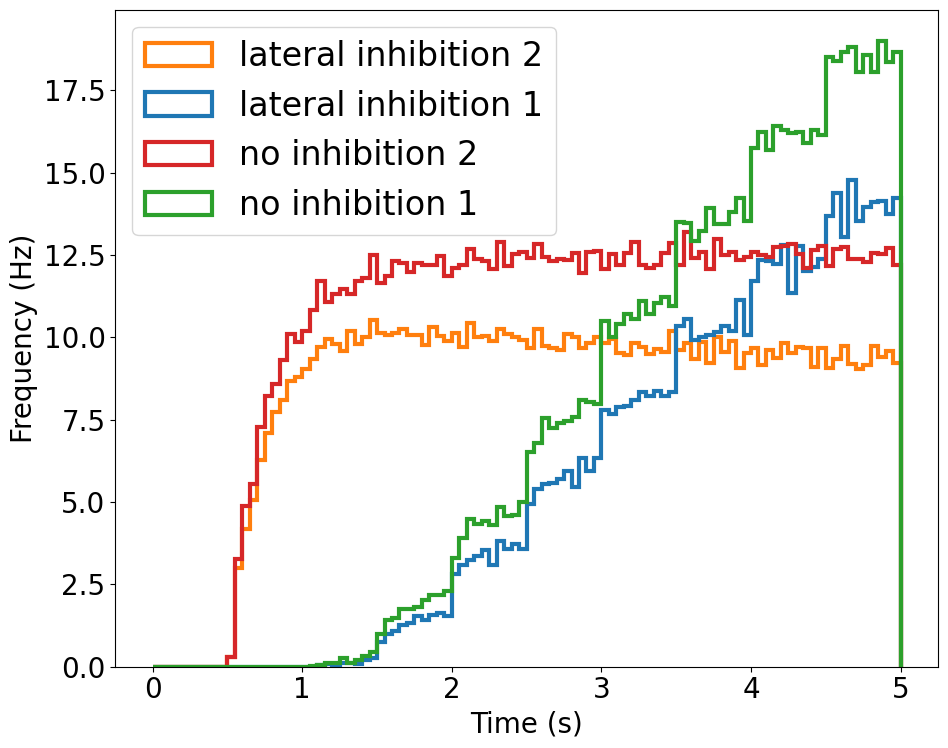

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)